['', '', '']
pin
['pin', '', '', '', '', '', '', '', '', '']
Error: load type not chosen


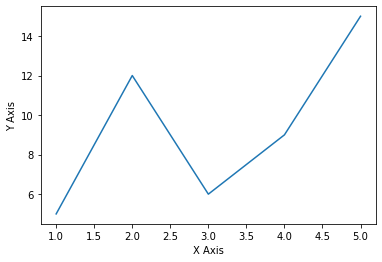

In [2]:
import kivy
import pandas as pd
import requests
import numpy as np
from kivy.app import App 
from kivy.uix.label import Label
from kivy.uix.gridlayout import GridLayout
from kivy.uix.textinput import TextInput
from kivy.uix.button import Button
from kivy.uix.togglebutton import ToggleButton
from kivy.uix.widget import Widget
from kivy.properties import ObjectProperty
from kivy.properties import BooleanProperty
from kivy.uix.floatlayout import FloatLayout
from kivy.graphics import Rectangle
from kivy.graphics import Color
from kivy.graphics import Line
from kivy.lang import Builder
from kivy.uix.screenmanager import ScreenManager, Screen
from kivy.core.window import Window
from kivy.properties import StringProperty
from kivy.properties import NumericProperty
from kivy.properties import ListProperty
from kivy.uix.image import Image
from kivy.garden.matplotlib.backend_kivyagg import FigureCanvasKivyAgg
import matplotlib.pyplot as plt
from kivy.uix.tabbedpanel import TabbedPanel 

Window.size = (800, 800)

#Variables Bucket...
calc_list = [""] * 10
#E value in GPA
#e_dict = {"wood": 0.0, "steel": 200.0, "aluminum": 69.0, "concrete": 30.0, "plastic": 0.8}
#print(calc_list)

#Output
output_list = [""] * 3    #Angle Left, Angle Right, Deflection
print(output_list)


class ConnectionWindow(Screen):

    #Save Connection Type Chosen
    connection = ObjectProperty(None)
    def connection_fixed(self):
        connection = "fixed"
        print(connection)
        ConnectionWindow.connection = connection
        calc_list [0] = connection  
    def connection_pin (self):
        connection = "pin"
        print(connection)
        ConnectionWindow.connection = connection
        calc_list [0] = connection


class VariablesWindow (Screen):
    
    #Save Load Type Chosen
    load = ObjectProperty(None)

    def load_distributed(self):
        load = "distributed"
        VariablesWindow.load = load
        calc_list [1] = load
        
    def load_point(self):
        load = "point"
        VariablesWindow.load = load
        calc_list [1] = load
    def load_moment(self):
        load = "moment"
        VariablesWindow.load = load
        calc_list [1] = load   

    #Save Material Type
    material = ObjectProperty(None)
    material_database_name = ObjectProperty (None)

    def mat_wood(self):
        material = "wood"
        VariablesWindow.material = material
        calc_list[8] = material
        calc_list[9] = "Pine Wood (along grain)"    
    def mat_steel(self):
        material = "steel"
        #chose steel, structural, ASTM-A36 @ 200 GPA
        VariablesWindow.material = material
        calc_list[8] = material
        calc_list[9] = "Steel, Structural ASTM-A36"
    def mat_aluminum(self):
        material = "aluminum"
        #chose aluminum @ 69 GPA
        VariablesWindow.material = material
        calc_list[8] = material
        calc_list[9] = "Aluminum"
    def mat_concrete(self):
        material = "concrete"
        #chose HSC concrete @ 30 GPA
        VariablesWindow.material = material
        calc_list[8] = material
        calc_list[9] = "Concrete, High Strength (compression)"
    def mat_plastic(self):
        material = "plastic"
        #chose poly HDPE @ 0.8 GPA
        VariablesWindow.material = material
        calc_list[8] = material
        calc_list[9] = "Polyethylene HDPE (high density)"

    #Save Input Variables
    def save_variables(self):
        calc_list [2] = load_value = self.ids.load_value.text
        calc_list [3] = a_value = self.ids.a_value.text
        #calc_list [4] = r_value = self.ids.r_value.text
        calc_list [5] = b_value = self.ids.b_value.text
        calc_list [6] = h_value = self.ids.h_value.text
        calc_list [7] = l_value = self.ids.l_value.text
        print(calc_list)

    #Pass Variables through Calculator, Output Result
    error_message = StringProperty()

    def calculate_variables(self):        
        #Transfer Variables from Calc_list into instance of variable
        connection_final = calc_list[0]
        load_type_final = calc_list[1]
        load_final = (calc_list[2])
        a_final = (calc_list[3])
        #r_final = (calc_list[4])
        b_final = (calc_list[5])        
        h_final = (calc_list[6])
        l_final = (calc_list[7])
        material_final = calc_list[8]
        #error_message = str("")

        #Troubleshoot Missing Variables Before They Are Passed
        if connection_final == "":
            error_message = "Error: connection not chosen"
            self.manager.get_screen("output").ids.error_checker.text = error_message
            print(error_message)
            return
        if load_type_final == "":
            error_message = "Error: load type not chosen"
            self.manager.get_screen("output").ids.error_checker.text = error_message
            print(error_message)
            return
        if load_final == "":
            error_message = "Error: load magnitude not entered"
            self.manager.get_screen("output").ids.error_checker.text = error_message
            print(error_message)
            return
        if a_final == "":
            error_message = "Error: distance A not entered"
            self.manager.get_screen("output").ids.error_checker.text = error_message
            print(error_message)
            return
        if l_final == "":
            error_message = "Error: length of beam not entered"
            self.manager.get_screen("output").ids.error_checker.text = error_message
            print(error_message)
            return
        if material_final == "":
            error_message = "Error: material type not chosen"
            self.manager.get_screen("output").ids.error_checker.text = error_message
            print(error_message)
            return          
        #Check Beam Dimensions 
        if h_final == "" or b_final == "":
            error_message = "Error: beam dimensions not input"
            self.manager.get_screen("output").ids.error_checker.text = error_message
            print(error_message)
            return
        else:
            error_message = "Calculation Successful"
            self.manager.get_screen("output").ids.error_checker.text = error_message
        
        #Convert Numbers to Floats if Troubleshoot Test Passes
        load_final = float(calc_list[2])
        a_final = float(calc_list[3])
        #r_final = float(calc_list[4])
        b_final = float(calc_list[5])
        h_final = float(calc_list[6])
        l_final = float(calc_list[7])

        #Pull Material Database if Everything Pases
        #def get E(material)
        url = 'https://www.engineeringtoolbox.com/young-modulus-d_417.html'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        df.columns = ['Material', 'YM', 'UTS', 'YS']
        data = df.to_dict(orient='index')

        #Search for Young Modulus of Specified Material in Dictionary
        i = calc_list[9]
        for n in range(len(data)):
            if i == data[n]['Material']:
                Epull = float(data[n]['YM'])*10**9
                break
            else:
                n = n+1

        #Assign E value based on material_final
        #e_final = e_dict[material_final]
        #print(material_final, "e value = ", e_final)
        e_final = Epull 
        print(i, "e value = ", e_final)

        #Calculate Beam Properties
        area = h_final * b_final
        moi = (1/12)*b_final*(h_final)**3

        deflection = float()
        angle_left = float()
        angle_right = float()

        if connection_final == "fixed":
            if load_type_final == "distributed":
                deflection = (4*l_final-a_final)*(load_final*a_final**3)/(24*e_final*moi)
                angle_left = (load_final*a_final**3)/(6*e_final*moi) 
            if load_type_final == "point":
                deflection = (3*l_final-a_final)*(load_final*a_final**2)/(6*e_final*moi)
                angle_left = (load_final*a_final**2)/(2*e_final*moi)
            if load_type_final == "moment":
                deflection = (2*l_final-a_final)*(load_final*a_final)/(2*e_final*moi)
                angle_left = (load_final*a_final)/(e_final*moi)

        if connection_final == "pin":
            if load_type_final == "distributed":
                angle_left = ((2*l_final-a_final)**2)*(load_final*(a_final**2))/(24*l_final*e_final*moi)
                angle_right = -1*(2*(l_final**2)-(a_final**2))*(load_final*(a_final**2))/(24*l_final*e_final*moi)
                deflection = (4*(l_final**2)-(7*a_final*l_final)+(3*(a_final**2)))*(load_final*(a_final**3))/(24*l_final*e_final*moi)
            if load_type_final == "point":
                C = l_final - a_final
                angle_left = (l_final+C)*(load_final*a_final*C)/(6*l_final*e_final*moi)
                angle_right = (l_final+a_final)*(load_final*a_final*C)/(6*l_final*e_final*moi)
                if a_final >= C:
                    deflection = (3*(l_final**2)-4*(C**2))*(load_final*C)/(48*e_final*moi)
                else:
                    deflection = (3*(l_final**2)-4*(a_final**2))*(load_final*a_final)/(48*e_final*moi)
            if load_type_final == "moment":
                C = l_final - a_final
                angle_left = (6*a_final*l_final-(3*(a_final**2))-2*(l_final**2))*load_final/(6*l_final*e_final*moi)
                angle_right = (3*(a_final**2)-(l_final**2))*load_final/(6*l_final*e_final*moi)
                if a_final <= (l_final/2):
                    deflection = -1*(np.sqrt(3))*load_final*(((l_final**2)-(a_final**2))**1.5)/(27*e_final*l_final*moi)
                else:
                    deflection = (np.sqrt(3))*load_final*(((l_final**2)-(C**2))**1.5)/(27*e_final*l_final*moi)

        output_list [0] = angle_left
        output_list [1] = angle_right
        output_list [2] = deflection

        print("angle_left =", output_list [0])
        print("angle_right =", output_list [1])
        print("deflection =", output_list [2])

        #self.root.output.ids.angle_left_label.text = output_list[0]
        self.manager.get_screen("output").ids.angle_left_label.text = str(output_list[0])
        self.manager.get_screen("output").ids.angle_right_label.text = str(output_list[1])
        self.manager.get_screen("output").ids.deflection_label.text = str(output_list[2])

        #angle_left_output = output_list[0]


                    
class OutputWindow (Screen):

    # def reset_error_message(self):
    #     error_message = "Calculation Successful"
    #     self.manager.get_screen("output").ids.error_checker.text = error_message
  
    def output_pass(self):
        print("angle_left =", output_list [0])
        print("angle_right =", output_list [1])
        print("deflection =", output_list [2]) 

    def save_plot_data(self):
        #Test Plotting
        x = [1,2,3,4,5]
        y = [5, 12, 6, 9, 15]

        plt.plot(x,y)
        plt.ylabel("Y Axis")
        plt.xlabel("X Axis")

        plt.savefig('plotdata.jpg')

class Matplotlib(Screen):
    pass

class Experiment(Screen):
    pass

class WindowManager(ScreenManager):
    load = StringProperty("")
    connection = StringProperty("")
    mat = StringProperty("")
    test = StringProperty("")




kv = Builder.load_file("my.kv")

class MainApp (App):
    def build (self):
        Window.clearcolor = (0,0,0,1)
        return kv

#Run Program 
if __name__ == "__main__":
    MainApp().run()

In [3]:
#1. Create Function to Pull From Database and clean data for specific materials
#2. Create Function that takes a request for specific material and pulls E value for that material

import requests
import numpy as np
import pandas as pd

#Extract Elastic Modulus

def getE(Material):

    url = 'https://www.engineeringtoolbox.com/young-modulus-d_417.html'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    df = df_list[-1]
    #df.to_csv('MaterialProperties.csv')
    df.columns = ['Material', 'YM', 'UTS', 'YS']

#data = df.set_index('Material').to_dict(orient='index')
    data = df.to_dict(orient='index')
#del data[('UTS')]
#del data[('YS')]

    i = Material

    n = 0
    for n in range(len(data)):
        if i == data[n]['Material']:
            Epull = data[n]['YM']
            break
        else:
            n = n + 1

    if Epull == 'nan':
        print("There is no Young's Modulus Available")
    else:
        E = (float(Epull.split('-')[0])*(10**9))
        print("The Young's Modulus is ",E," Pa")

getE("Concrete, High Strength (compression)")


#Extract price history of materials (Note: we could graph these on mat plotlib and output graph on our GUI to show user how the price of metals are going)

# url = 'https://www.bls.gov/regions/mid-atlantic/data/producerpriceindexmetals_us_table.htm'
# html = requests.get(url).content
# df_list = pd.read_html(html)
# df = df_list[-1]
# print(df)
# df.to_csv('MaterialCosts.csv')


The Young's Modulus is  30000000000.0  Pa
